In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("forestfires.csv")
print(df.shape)
print(df["size_category"].value_counts())
df

(517, 31)
small    378
large    139
Name: size_category, dtype: int64


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [4]:
X=np.loadtxt("forestfires.csv",delimiter=",",usecols=range(2,30),skiprows=1)

In [7]:
lblen = LabelEncoder()
Y=np.array(lblen.fit_transform(df["size_category"]))

(517, 28)

In [210]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(42,input_dim=28,activation='ReLU'))
model.add(tf.keras.layers.Dense(42,activation='sigmoid'))
model.add(tf.keras.layers.Dense(42,activation='ReLU'))
model.add(tf.keras.layers.Dense(42,activation='ReLU'))
model.add(tf.keras.layers.Dense(1))

In [211]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_104 (Dense)            (None, 42)                1218      
_________________________________________________________________
dense_105 (Dense)            (None, 42)                1806      
_________________________________________________________________
dense_106 (Dense)            (None, 42)                1806      
_________________________________________________________________
dense_107 (Dense)            (None, 42)                1806      
_________________________________________________________________
dense_108 (Dense)            (None, 1)                 43        
Total params: 6,679
Trainable params: 6,679
Non-trainable params: 0
_________________________________________________________________


In [212]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

In [213]:
history=model.fit(X,Y,validation_split=0.2,epochs=50,batch_size=100)

Epoch 1/50
5/5 [==============================] - 0s 26ms/step - loss: 9.2179 - accuracy: 0.2615 - val_loss: 1.4906 - val_accuracy: 0.2981
Epoch 2/50
5/5 [==============================] - 0s 6ms/step - loss: 1.2428 - accuracy: 0.2688 - val_loss: 0.8220 - val_accuracy: 0.3846
Epoch 3/50
5/5 [==============================] - 0s 6ms/step - loss: 0.7236 - accuracy: 0.4310 - val_loss: 0.7259 - val_accuracy: 0.7404
Epoch 4/50
5/5 [==============================] - 0s 6ms/step - loss: 0.6834 - accuracy: 0.7676 - val_loss: 0.7169 - val_accuracy: 0.7308
Epoch 5/50
5/5 [==============================] - 0s 6ms/step - loss: 0.5775 - accuracy: 0.7506 - val_loss: 0.5650 - val_accuracy: 0.7404
Epoch 6/50
5/5 [==============================] - 0s 6ms/step - loss: 0.5301 - accuracy: 0.7772 - val_loss: 0.6551 - val_accuracy: 0.4615
Epoch 7/50
5/5 [==============================] - 0s 5ms/step - loss: 0.5591 - accuracy: 0.7651 - val_loss: 0.5800 - val_accuracy: 0.7596
Epoch 8/50
5/5 [=================

In [214]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

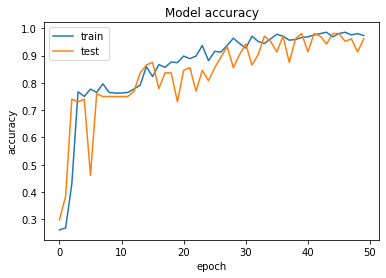

In [217]:
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("Model accuracy")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'test'], loc='upper left')

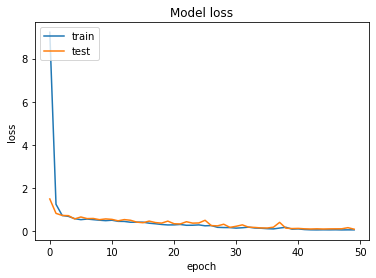

In [218]:
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Model loss")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'test'], loc='upper left')

In [221]:
print("Accuracy of model: "+str(np.mean(history.history['val_accuracy'])))
print("Loss of model: "+str(np.mean(history.history['val_loss'])))

Accuracy of model: 0.8371153831481933
Loss of model: 0.36487707525491714
